### Цель проекта
Целью данного проекта является построение модели машинного обучения для диагностики хронических заболеваний почек (ХБП) на основе медицинских показателей пациентов.

### Задачи:
1. Провести разведочный анализ данных (EDA).
2. Подготовить данные для моделирования.
3. Построить и сравнить модели машинного обучения.
4. Подобрать оптимальные гиперпараметры.
5. Проанализировать важность признаков и сделать выводы.

# 1. Разведочные данные

In [85]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [86]:
# Загрузка данных
df = pd.read_csv(
    'C:\\IDE\\Применение машинного обучения для анализа медицинских данных\\итог\\chronic.csv'
)

# Общая информация о данных
df.info()
print(df.head())
print(df.columns)
print(df['class'].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wc      400 non-null    object
 17  rc      400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

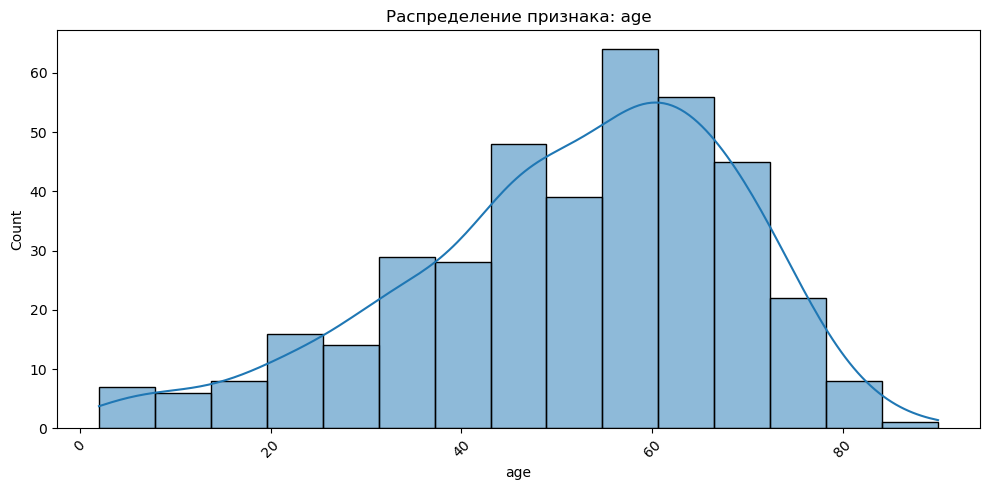

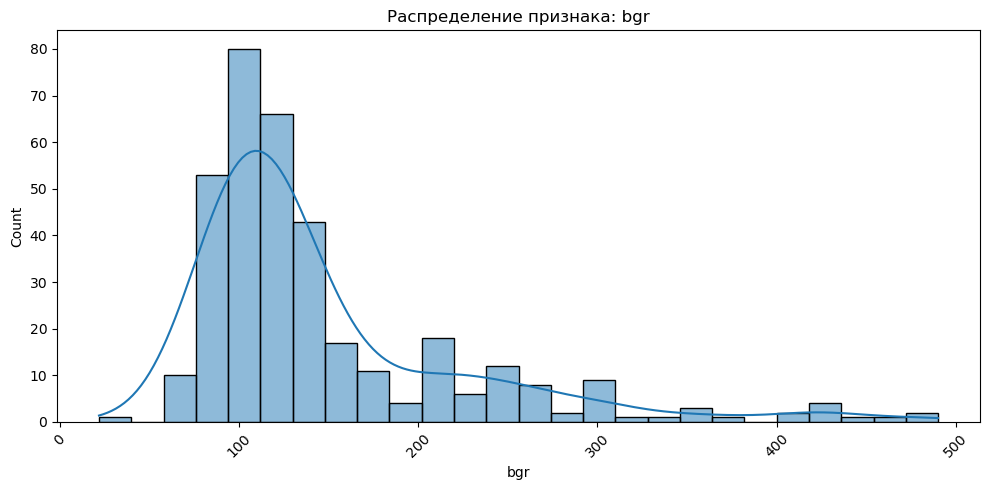

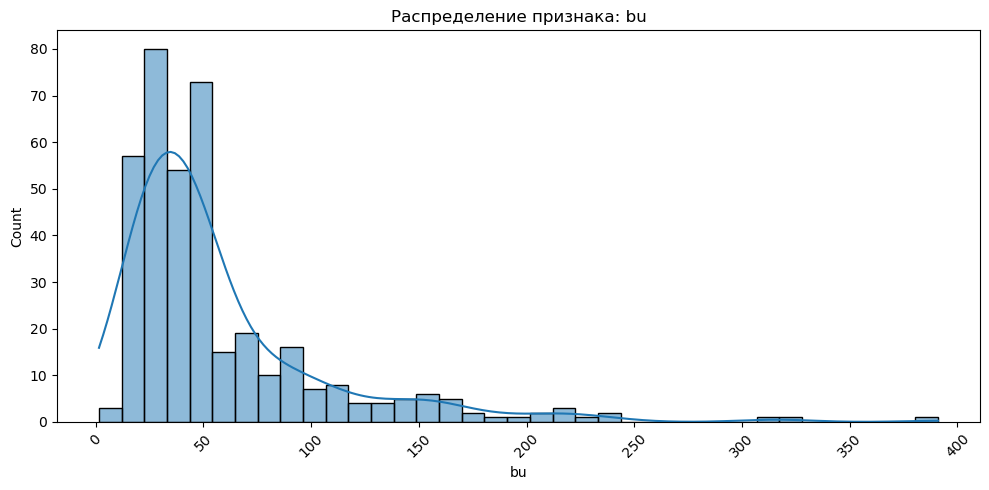

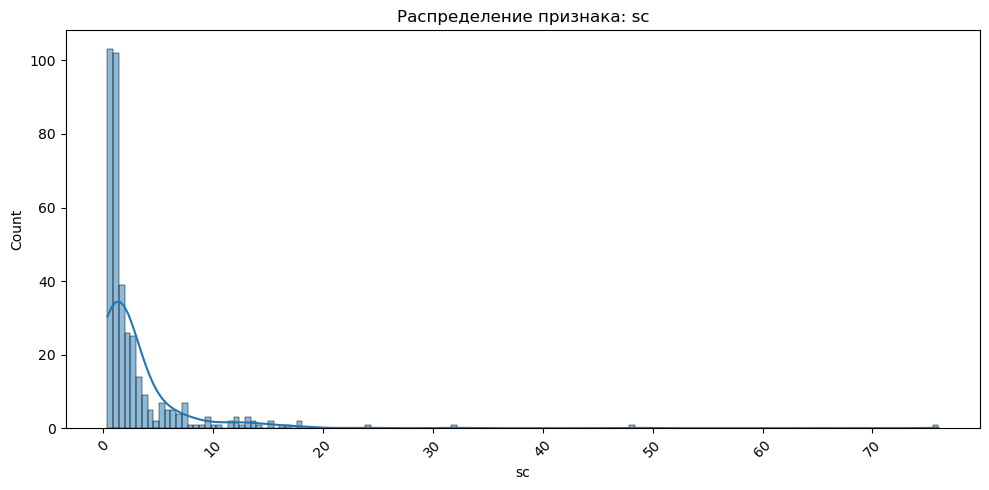

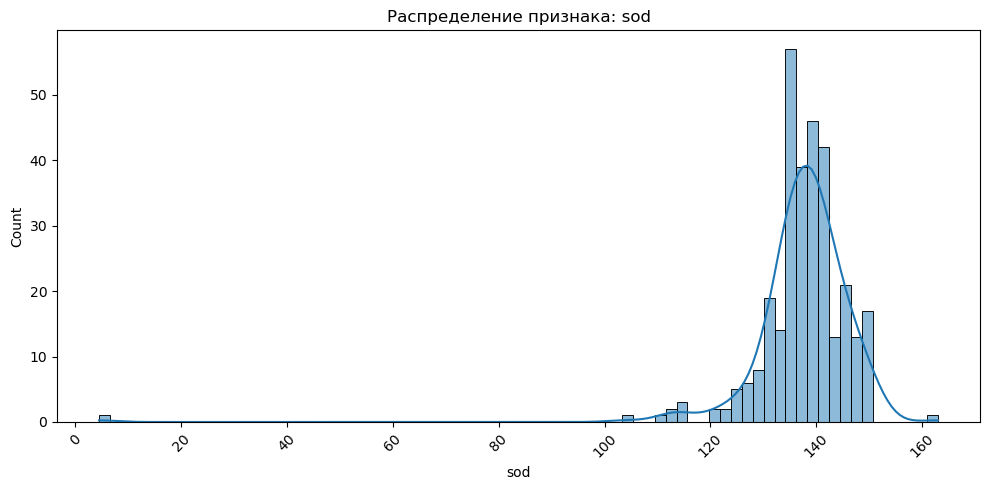

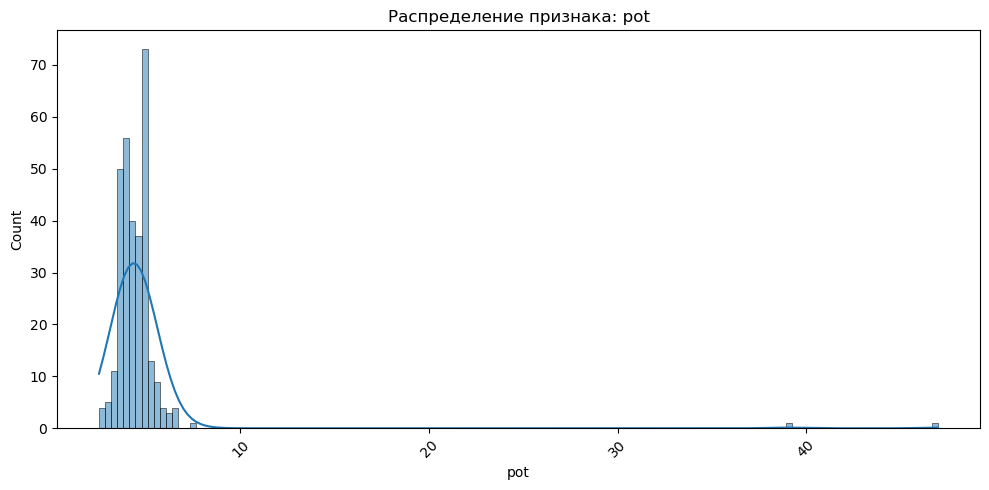

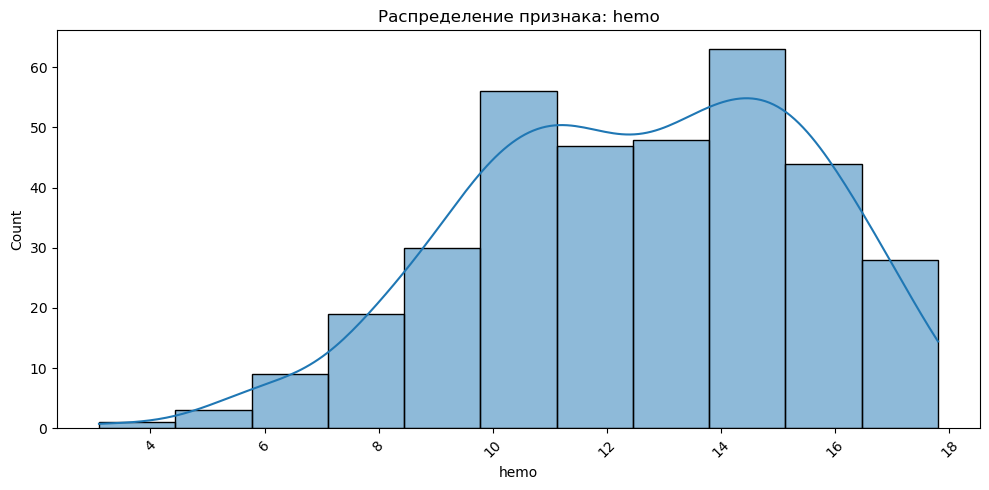

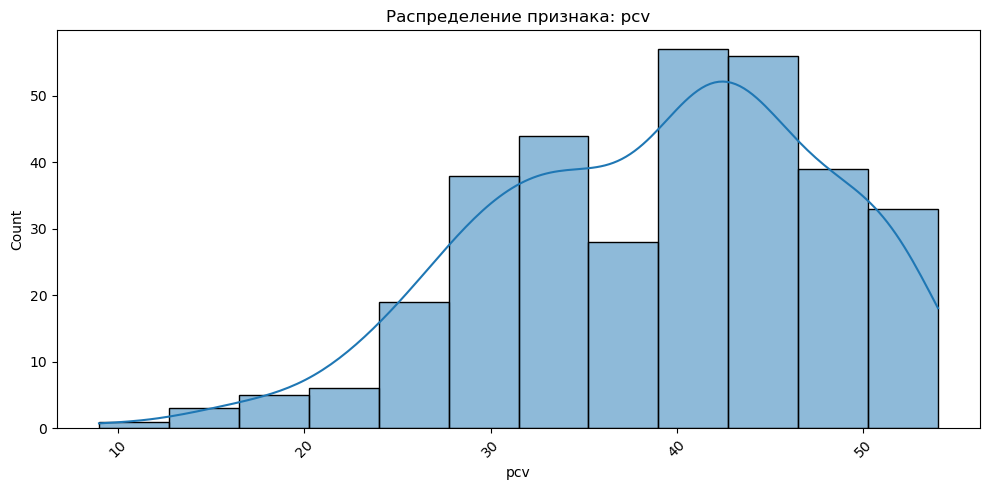

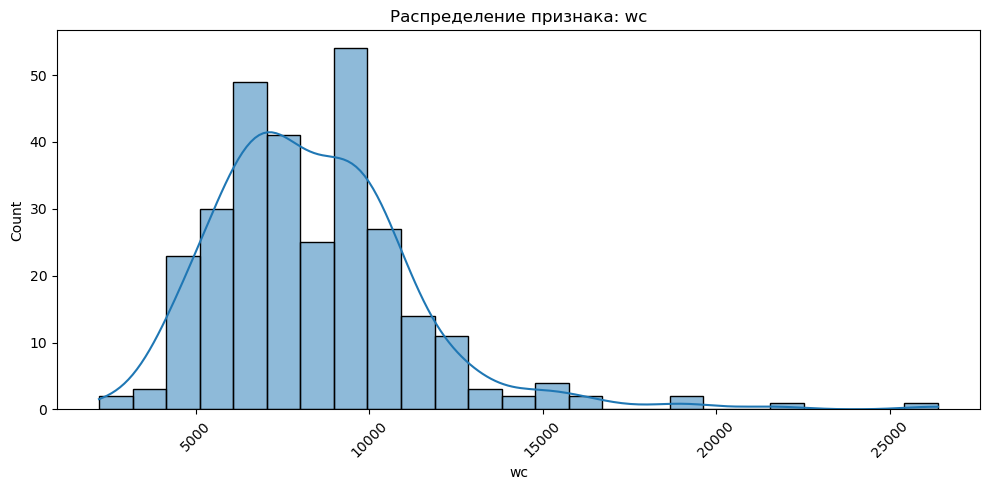

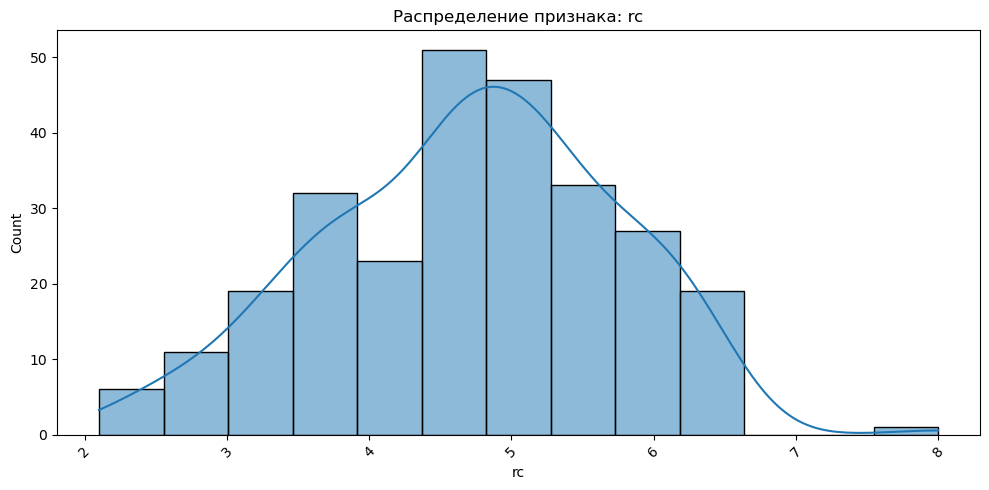

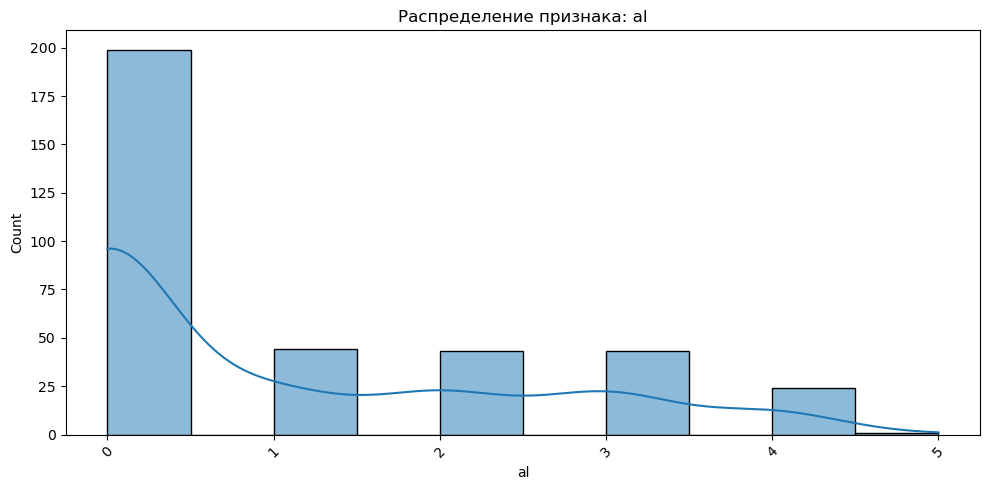

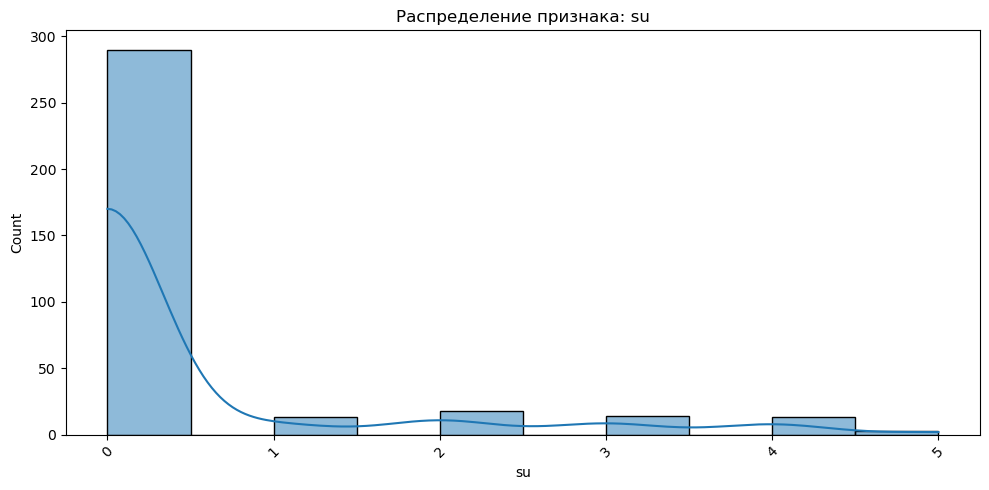

Пропущенные значения:
rbc      152
rc       131
wc       106
pot       88
sod       87
pcv       71
pc        65
hemo      52
su        49
sg        47
al        46
bgr       44
bu        19
sc        17
bp        12
age        9
ba         4
pcc        4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


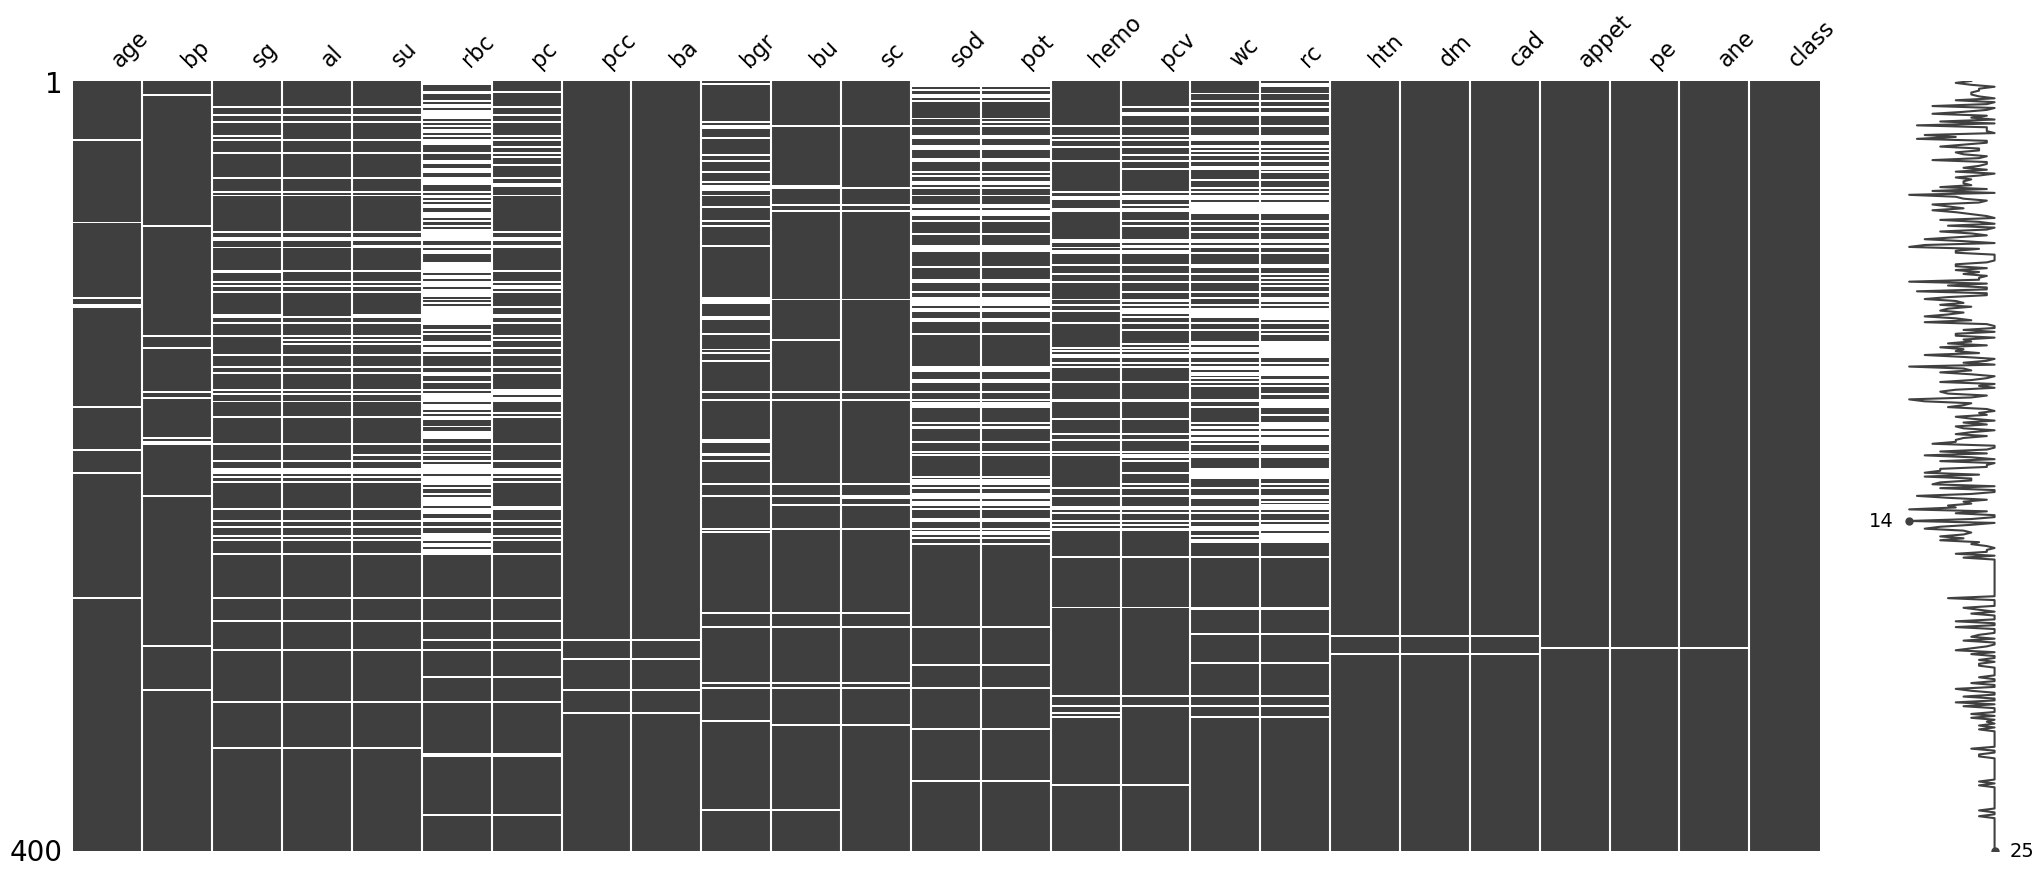

In [87]:
# Предварительный анализ и очистка данных

# Замена странных значений '?' на NaN
df.replace('?', np.nan, inplace=True)

# Список числовых признаков для преобразования
numeric_cols = ['age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'al', 'su']

# Приведение числовых колонок к числовому типу
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Первичный просмотр распределения числовых признаков
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Распределение признака: {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Вывод пропусков по столбцам
print("Пропущенные значения:")
print(df.isnull().sum().sort_values(ascending=False))

# Визуализация пропусков
msno.matrix(df)
plt.show()

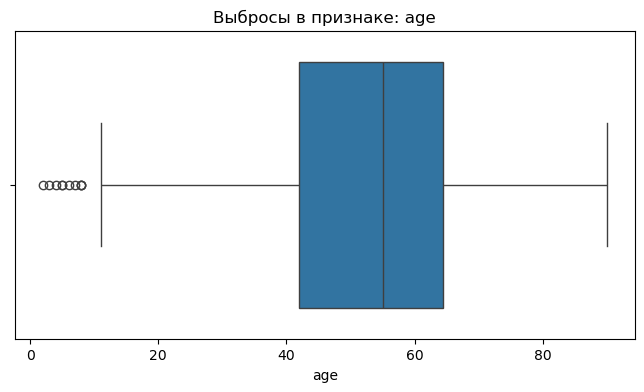

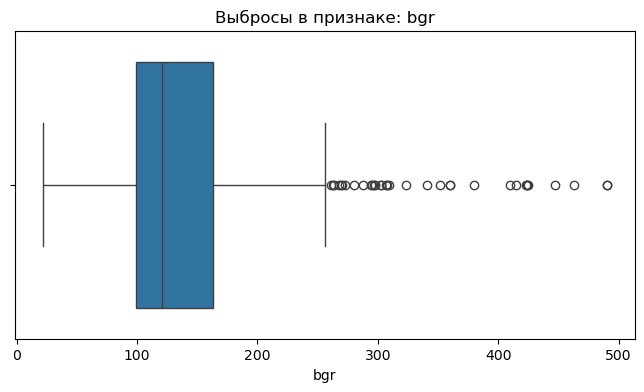

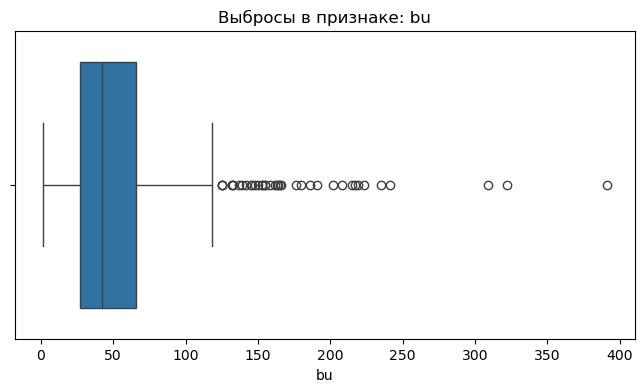

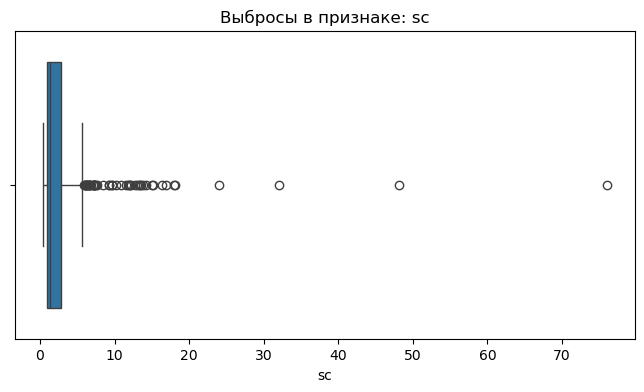

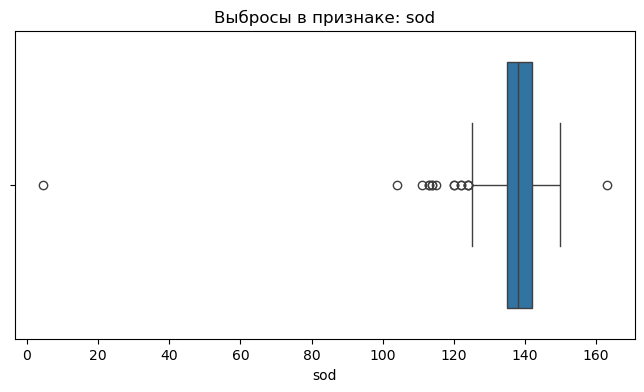

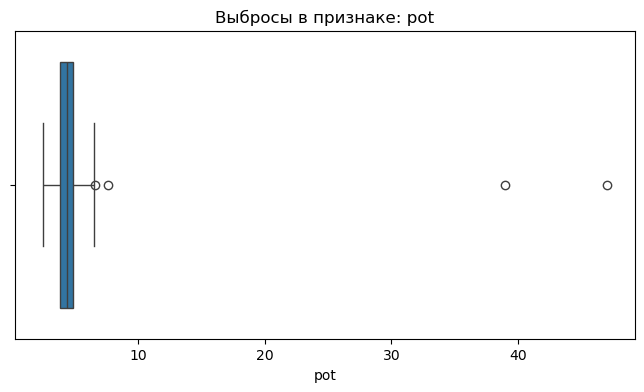

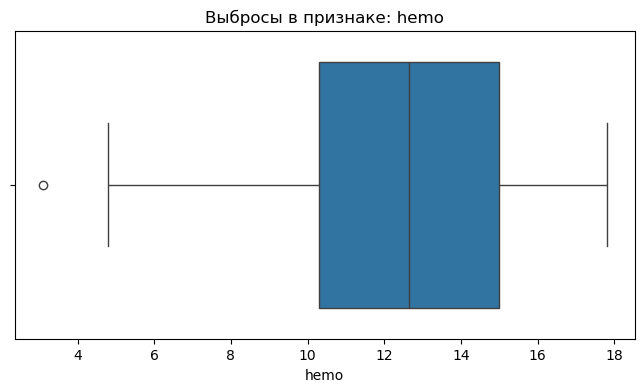

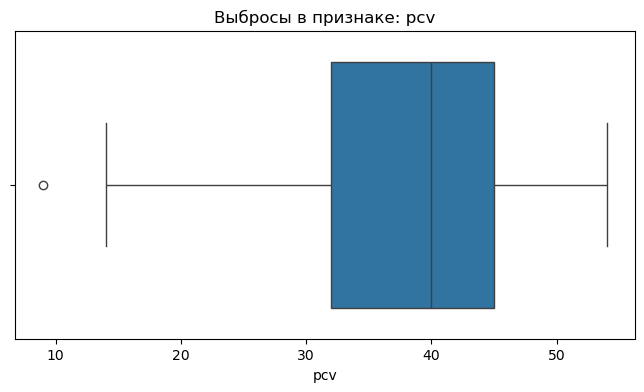

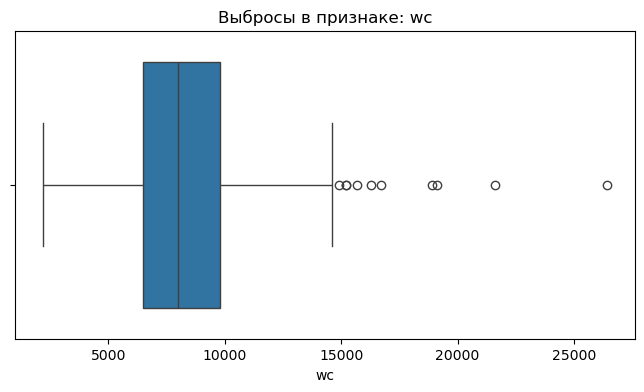

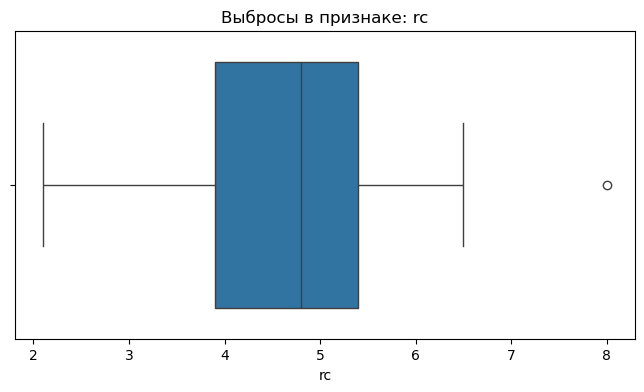

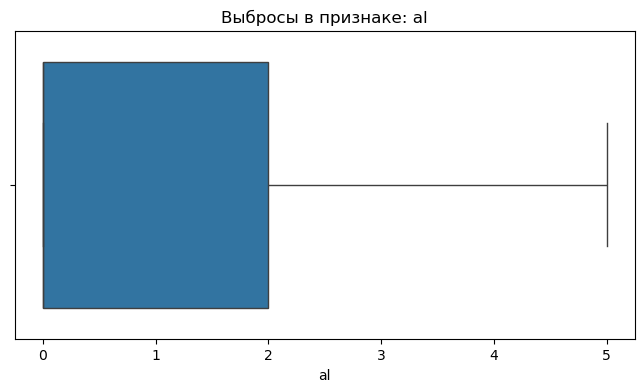

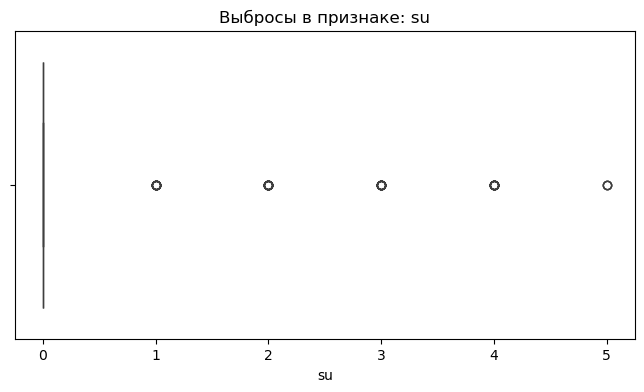

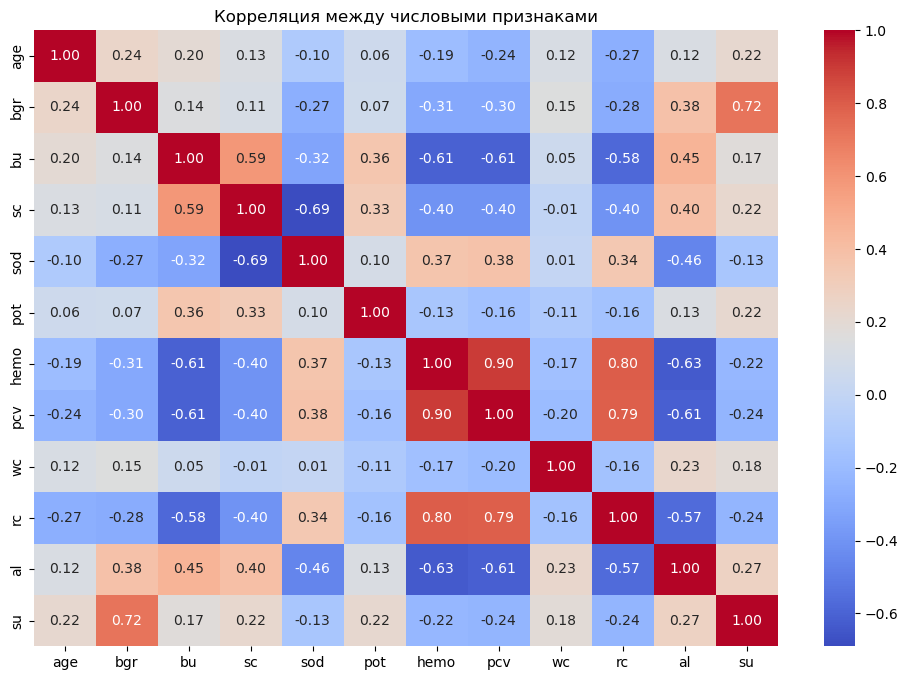

In [88]:
# Анализ выбросов и корреляция

# Анализ выбросов с помощью boxplot
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Выбросы в признаке: {col}')
    plt.show()

# Корреляционная матрица числовых признаков
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между числовыми признаками')
plt.show()


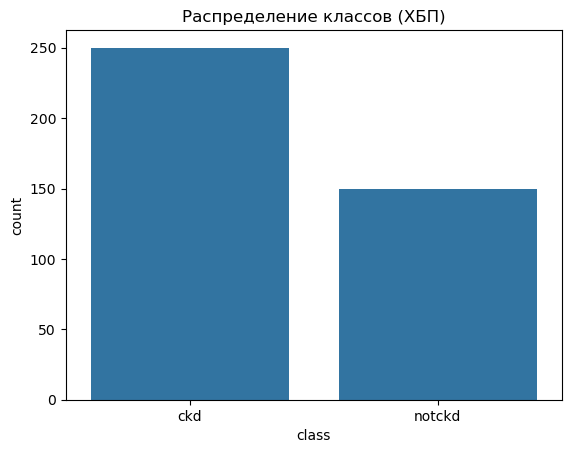

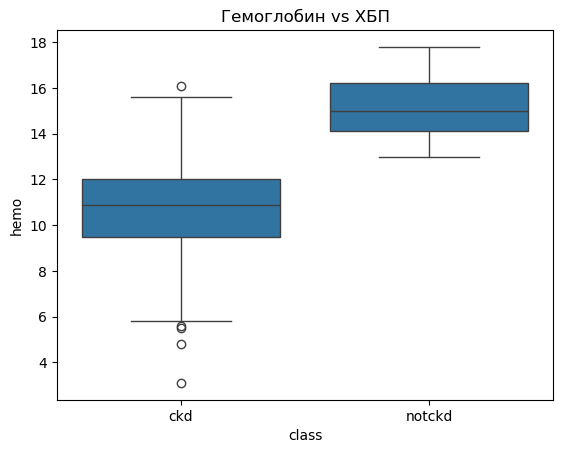

In [89]:
# Анализ целевой переменной

# Визуализация распределения классов и зависимости по гемоглобину
sns.countplot(x='class', data=df)
plt.title('Распределение классов (ХБП)')
plt.show()

sns.boxplot(x='class', y='hemo', data=df)
plt.title('Гемоглобин vs ХБП')
plt.show()


In [90]:
# Обработка пропусков и категориальных признаков

# Заполнение пропусков в числовых признаках медианой
for col in numeric_cols:
    median = df[col].median()
    df[col] = df[col].fillna(median)

# Список категориальных признаков
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Заполнение пропусков в категориальных признаках модой
for col in cat_cols:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

# Проверяем уникальные значения целевой переменной до обработки
print("Уникальные значения class до обработки:", df['class'].unique())

# Обработка целевой переменной — очистка и преобразование
df['class'] = df['class'].fillna('missing').astype(str).str.strip().str.lower()
print("Уникальные значения class после очистки:", df['class'].unique())

# Маппинг классов в бинарный формат
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

print("Пропущенные значения в class после маппинга:", df['class'].isnull().sum())
print("Пропущенные значения после обработки:")
print(df.isnull().sum())

# Кодирование категориальных признаков
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())

Уникальные значения class до обработки: ['ckd' 'notckd']
Уникальные значения class после очистки: ['ckd' 'notckd']
Пропущенные значения в class после маппинга: 0
Пропущенные значения после обработки:
age       0
bp       12
sg       47
al        0
su        0
rbc       0
pc        0
pcc       0
ba        0
bgr       0
bu        0
sc        0
sod       0
pot       0
hemo      0
pcv       0
wc        0
rc        0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
class     0
dtype: int64
    age  bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...   pcv      wc   rc  \
0  48.0  80  1.020  1.0  0.0    1   1    0   0  121.0  ...  44.0  7800.0  5.2   
1   7.0  50  1.020  4.0  0.0    1   1    0   0  121.0  ...  38.0  6000.0  4.8   
2  62.0  80  1.010  2.0  3.0    1   1    0   0  423.0  ...  31.0  7500.0  4.8   
3  48.0  70  1.005  4.0  0.0    1   0    1   0  117.0  ...  32.0  6700.0  3.9   
4  51.0  80  1.010  2.0  0.0    1   1    0   0  106.0  ...  35.0  7300.0  4.6   



In [91]:
# Удаляем пропуски

# Преобразуем bp в числовой тип, заменяя ошибки на NaN
df['bp'] = pd.to_numeric(df['bp'], errors='coerce')

# Теперь можно посчитать медиану
bp_median = df['bp'].median()

# Заполняем пропуски медианой
df['bp'] = df['bp'].fillna(bp_median)

# Аналогично для sg — если там тоже строки, нужно проверить и привести к нужному типу
print(df['sg'].value_counts(dropna=False))

# Для sg обычно это категориальный признак, поэтому можно оставить как есть и заполнить модой
sg_mode = df['sg'].mode()[0]
df['sg'] = df['sg'].fillna(sg_mode)

# Проверяем, что пропусков нет
print(df[['bp', 'sg']].isnull().sum())

sg
1.020    106
1.010     84
1.025     81
1.015     75
NaN       47
1.005      7
Name: count, dtype: int64
bp    0
sg    0
dtype: int64


# 2.Подготовка данных для моделирования.
Цели:

* Нормализовать / масштабировать числовые признаки (если нужно)

* Разделить данные на признаки (X) и целевую переменную (y)

* Разбить выборку на обучающую и тестовую

In [92]:
# Преобразование категориальных признаков 
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Масштабирование числовых признаков
numeric_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
                'hemo', 'pcv', 'wc', 'rc']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Разделение на признаки и целевую переменную
X = df.drop(columns=['class'])
y = df['class']

# Разбиение на обучающую и тестовую выборки (например, 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Размеры выборок:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Размеры выборок:
X_train: (320, 24)
X_test: (80, 24)
y_train: (320,)
y_test: (80,)


#  3.Построение и сравнение модели машинного обучения.

In [93]:
# Импортируем модели
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Обучаем и оцениваем модели
for name, model in models.items():
    model.fit(X_train, y_train)  # Обучение
    y_pred = model.predict(X_test)  # Предсказание

    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

=== Logistic Regression ===
Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix:
[[30  0]
 [ 1 49]]


=== Random Forest ===
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[30  0]
 [ 0 50]]


=== SVM ===
Accuracy: 0.9750
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.

Random Forest — показывает идеальную точность, ни одной ошибки.

Logistic Regression и SVM — почти без ошибок.

на основе предоставленных данных выберу Random Forest

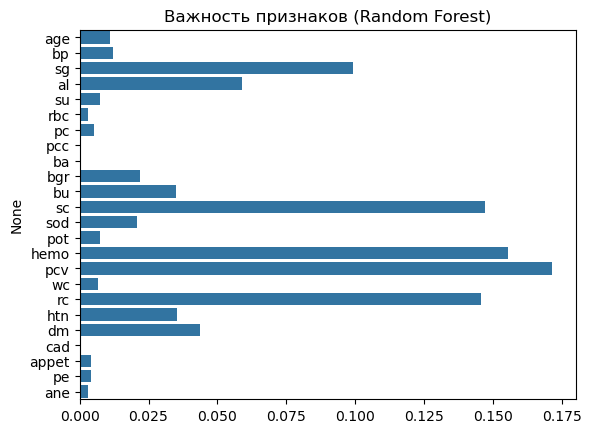

In [94]:
rf = models['Random Forest']
importances = rf.feature_importances_
features = X_train.columns

sns.barplot(x=importances, y=features)
plt.title('Важность признаков (Random Forest)')
plt.show()

# 4. Подобор оптимальных гиперпараметров для Random Forest.

In [95]:
# Задаём диапазон параметров для перебора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # кросс-валидация с 5 фолдами
    scoring='accuracy',  # метрика для оптимизации
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее качество на кросс-валидации:", grid_search.best_score_)

# Обучаем модель с лучшими параметрами на всей тренировочной выборке
best_rf = grid_search.best_estimator_

# Оцениваем на тесте
y_pred = best_rf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Точность на тесте:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Лучшее качество на кросс-валидации: 0.990625
Точность на тесте: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Матрица ошибок:
 [[30  0]
 [ 0 50]]


# 5. Проанализировать важность признаков и сделать выводы.

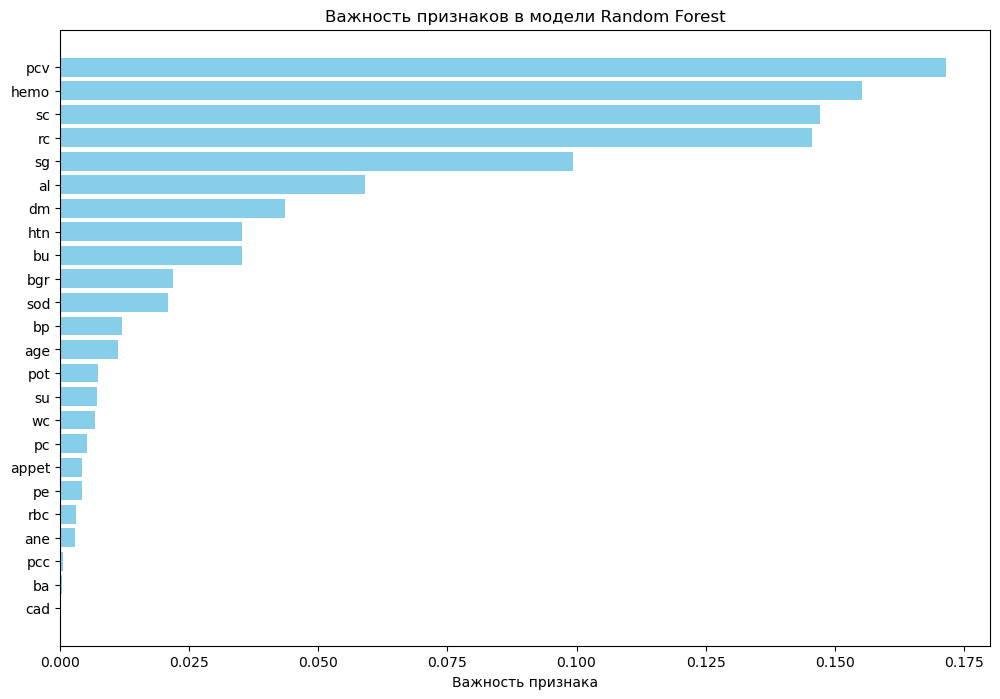

Топ-5 наиболее важных признаков:
   Feature  Importance
15     pcv    0.171513
14    hemo    0.155380
11      sc    0.147123
17      rc    0.145587
2       sg    0.099372


In [96]:

# Получаем важность признаков из обученной модели
feature_importances = best_rf.feature_importances_

# Создаем DataFrame для удобства отображения
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Сортируем признаки по убыванию важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели Random Forest')
plt.show()

# Вывод топ-5 наиболее важных признаков
print("Топ-5 наиболее важных признаков:")
print(importance_df.head(5))




Анализ важности признаков
* PCV (Packed Cell Volume, гематокрит) — самый важный признак с весом около 17%. Он отражает объем красных кровяных телец в крови и тесно связан с состоянием крови и кислородной насыщенностью организма. Его значимость логична, так как почечная функция влияет на кроветворение.

* Hemo (гемоглобин) — второй по важности (15.5%). Гемоглобин напрямую связан с анемией, которая часто сопутствует хроническим заболеваниям почек.

* SC (Serum Creatinine, сывороточный креатинин) — третий (14.7%). Это ключевой биохимический маркер функции почек, повышение уровня креатинина указывает на ухудшение фильтрации почек.

* RC (Red Blood Cells, эритроциты) — четвёртый (14.5%). Эритроциты тоже отражают состояние крови и анемии, связанной с почечными заболеваниями.

* SG (Specific Gravity, удельный вес мочи) — пятый (9.9%). Удельный вес мочи показывает концентрационную функцию почек и её нарушение при болезни.

# Заключение

В ходе исследования была проведена комплексная работа по анализу и моделированию данных для задачи классификации хронической болезни почек (ХБП). Были выполнены следующие этапы:

* Произведена очистка и предобработка данных, включая обработку пропусков, преобразование категориальных признаков и нормализацию числовых.

* Проведен разведочный анализ данных с визуализацией распределений и корреляций признаков.

* Построены и сравнены несколько моделей машинного обучения (логистическая регрессия, случайный лес, SVM). Лучшими результатами отличилась модель случайного леса с точностью на тестовой выборке 100%.

* Оптимизированы гиперпараметры модели случайного леса с помощью GridSearchCV, что позволило добиться максимального качества на кросс-валидации.

* Проанализирована важность признаков, выявлены ключевые медицинские показатели (гематокрит, гемоглобин, креатинин и другие), играющие существенную роль в диагностике ХБП.

**Рекомендации:**
* Результаты показывают, что модель случайного леса является надежным инструментом для автоматической классификации ХБП и может быть использована в клинической практике для поддержки принятия решений.

* Для повышения обобщающей способности модели рекомендуется расширить набор данных, включив больше пациентов и разнообразных клинических случаев.

* Следующим шагом может стать исследование более сложных моделей, например, градиентного бустинга или нейросетей, а также анализ влияния взаимодействий признаков.

* Важно интегрировать полученные модели в информационные системы здравоохранения с удобным интерфейсом для врачей.

* Дополнительно можно провести исследование по интерпретируемости моделей, чтобы повысить доверие к автоматическим решениям.
